# Graph algorithms with `networkx`

In [1]:
import kglab

namespaces = {
    "wtm": "http://purl.org/heals/food/",
    "ind": "http://purl.org/heals/ingredient/",
    }

kg = kglab.KnowledgeGraph(
    name = "A recipe KG example based on Food.com",
    base_uri = "https://www.food.com/recipe/",
    language = "en",
    namespaces = namespaces,
    )

kg.load_ttl("tmp.ttl")

In [2]:
import networkx as nx

g = nx.Graph()
ind_nodes = set()

query = """
        SELECT ?url ?ind
           WHERE {
              ?url rdf:type wtm:Recipe .
              ?url wtm:hasIngredient ?ind .
           }
        """

for row in kg.query(query):
    url, ind = row

    s_label = url.n3(kg._g.namespace_manager)
    s_id = kg.get_node_id(s_label)

    o_label = ind.n3(kg._g.namespace_manager)
    o_id = kg.get_node_id(o_label)

    print("{}: {}\n {}: {}\n".format(s_id, s_label, o_id, o_label))

    g.add_node(s_id)
    g.add_node(o_id)
    g.add_edge(s_id, o_id)
    ind_nodes.add(o_id)

0: <https://www.food.com/recipe/368491>
 1: ind:ChickenEgg

0: <https://www.food.com/recipe/368491>
 2: ind:Water

0: <https://www.food.com/recipe/368491>
 3: ind:AllPurposeFlour

0: <https://www.food.com/recipe/368491>
 4: ind:Salt

0: <https://www.food.com/recipe/368491>
 5: ind:OliveOil

6: <https://www.food.com/recipe/440609>
 3: ind:AllPurposeFlour

6: <https://www.food.com/recipe/440609>
 7: ind:Butter

6: <https://www.food.com/recipe/440609>
 8: ind:CowMilk

9: <https://www.food.com/recipe/72402>
 2: ind:Water

9: <https://www.food.com/recipe/72402>
 5: ind:OliveOil

9: <https://www.food.com/recipe/72402>
 10: ind:Garlic

11: <https://www.food.com/recipe/197303>
 7: ind:Butter

11: <https://www.food.com/recipe/197303>
 1: ind:ChickenEgg

11: <https://www.food.com/recipe/197303>
 8: ind:CowMilk

12: <https://www.food.com/recipe/261361>
 2: ind:Water

12: <https://www.food.com/recipe/261361>
 4: ind:Salt

12: <https://www.food.com/recipe/261361>
 3: ind:AllPurposeFlour

12: <https

In [3]:
results = nx.onion_layers(g)

for node_id, core_number in sorted(results.items(), key=lambda item: item[1], reverse=True):
    if node_id in ind_nodes:
        node_label = kg.get_node_label(node_id)
        print("{:6.3f} {}".format(core_number, node_label))

14.000 ind:ChickenEgg
14.000 ind:AllPurposeFlour
14.000 ind:Salt
14.000 ind:Butter
14.000 ind:CowMilk
12.000 ind:BlackPepper
12.000 ind:Water
 9.000 ind:OliveOil
 6.000 ind:WholeWheatFlour
 3.000 ind:Garlic
 3.000 ind:Honey
 3.000 ind:AppleCiderVinegar


In [4]:
results = nx.degree_centrality(g)
ind_rank = {}

for node_id, rank in sorted(results.items(), key=lambda item: item[1], reverse=True):
    if node_id in ind_nodes:
        node_label = kg.get_node_label(node_id)
        ind_rank[node_id] = rank
        print("{:6.3f} {}".format(rank, node_label))

 0.645 ind:ChickenEgg
 0.585 ind:Salt
 0.568 ind:AllPurposeFlour
 0.432 ind:CowMilk
 0.399 ind:Butter
 0.383 ind:Water
 0.093 ind:OliveOil
 0.071 ind:Garlic
 0.060 ind:BlackPepper
 0.055 ind:WholeWheatFlour
 0.049 ind:Honey
 0.027 ind:AppleCiderVinegar


In [5]:
import networkx.algorithms.distance_measures as nx_measure

nx_measure.diameter(g)

5

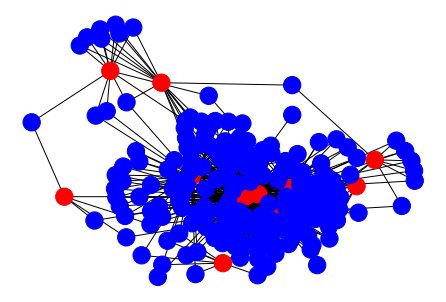

In [6]:
import matplotlib.pyplot as plt

color = [ "red" if n in ind_nodes else "blue" for n in g.nodes()]

nx.draw(g, node_color=color, with_labels=False)
plt.show()

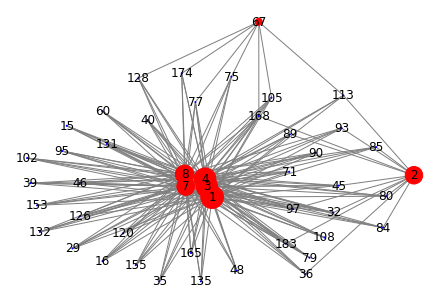

In [7]:
core_g = nx.k_core(g)
color = [ "red" if n in ind_nodes else "blue" for n in core_g ]
size = [ ind_rank[n] * 800 if n in ind_nodes else 1 for n in core_g ]

nx.draw(core_g, node_color=color, node_size=size, edge_color="gray", with_labels=True)
plt.show()

In [8]:
for node_id, rank in sorted(ind_rank.items(), key=lambda item: item[1], reverse=True):
    if node_id in core_g:
        node_label = kg.get_node_label(node_id)
        print("{:3} {:6.3f} {}".format(node_id, rank, node_label))

  1  0.645 ind:ChickenEgg
  4  0.585 ind:Salt
  3  0.568 ind:AllPurposeFlour
  8  0.432 ind:CowMilk
  7  0.399 ind:Butter
  2  0.383 ind:Water
 67  0.060 ind:BlackPepper


In [9]:
page_rank = nx.pagerank(g)

for node_id, rank in sorted(ind_rank.items(), key=lambda item: item[1], reverse=True):
    if node_id in core_g:
        node_label = kg.get_node_label(node_id)
        print("{:3} {:6.3f} {:6.3f} {}".format(node_id, rank, page_rank[node_id], node_label))

  1  0.645  0.088 ind:ChickenEgg
  4  0.585  0.076 ind:Salt
  3  0.568  0.074 ind:AllPurposeFlour
  8  0.432  0.056 ind:CowMilk
  7  0.399  0.054 ind:Butter
  2  0.383  0.055 ind:Water
 67  0.060  0.008 ind:BlackPepper
